# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
from lexical_diversity import lex_div as ld
import os.path
import datetime

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "D:/USD-ADS_graduate/ADS-509/Module 1/ADS_509_module1/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 13
    num_unique_tokens = 9
    lexical_diversity = 0.692
    num_characters = 55
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: To ensure that our code/logic and texts/strings are correct before moving to the next step.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [82]:
# Read in the lyrics data
lyrics_path = data_location + lyrics_folder
artists = os.listdir(lyrics_path)

a = []
b = []
c = []

for artist in artists:
    raw_song = os.listdir(lyrics_path+artist)
    for song in raw_song:
        a.append(str(artist))
        f = open(lyrics_path+artist+'/'+song, "r")
        song = re.search('_(.+?).txt',song).group(1)
        b.append(song)  
        c.append(f.read())

lyrics_df = pd.DataFrame({'artist':a,
                           'song':b,
                           'song_content':c})

lyrics_df.head()

,artist,song,song_content
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her..."


In [7]:
# Read in the twitter data
twitter_path = data_location + twitter_folder
twitter_files = os.listdir(twitter_path)

mariah_df = pd.DataFrame()
nicki_df = pd.DataFrame()

mariah_des = pd.read_csv(os.path.join(twitter_path, 'MariahCarey_followers.txt'),sep='\t')['description']
nicki_des = pd.read_csv(os.path.join(twitter_path, 'NICKIMINAJ_followers.txt'),sep='\t')['description']

mariah_df['artist'] = ['Mariah Carey']*len(mariah_des)
mariah_df['description'] = mariah_des

nicki_df['artist'] = ['Nicki Minaj']*len(nicki_des)
nicki_df['description'] = nicki_des

twitter_df = pd.concat([mariah_df,nicki_df])
twitter_df['description'] = twitter_df['description'].astype(str)

twitter_df.head()

,artist,description
0,Mariah Carey,nan
1,Mariah Carey,nan
2,Mariah Carey,nan
3,Mariah Carey,There’s nothing more inspiring than a story th...
4,Mariah Carey,♑️ | Bi | Take It Or Leave It 🤷🏾‍♂️| Don’t sta...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison
punctuation.add('’')

In [9]:
# create your clean twitter data here

# remove punctuation
def remove_punctuations(text):
    for punc in punctuation:
        text = text.replace(punc, '')
    return text

# split_on_whitespace
def split_on_whitespace(text):
    text = text.split()
    return text

# fold to lower case
def fold_to_lower_case(text_list):
    text_list = [i.casefold() for i in text_list]
    return text_list

# remove stop words
def remove_stop_words(text_list):
    text_list = [i for i in text_list if not i in sw]
    return text_list



twitter_df["description_clean"] = twitter_df['description']

twitter_df["description_clean"] = twitter_df['description_clean'].apply(remove_punctuations)\
.apply(split_on_whitespace).apply(fold_to_lower_case).apply(remove_stop_words)

In [10]:
twitter_df.head()

,artist,description,description_clean
0,Mariah Carey,nan,[nan]
1,Mariah Carey,nan,[nan]
2,Mariah Carey,nan,[nan]
3,Mariah Carey,There’s nothing more inspiring than a story th...,"[theres, nothing, inspiring, story, touches, h..."
4,Mariah Carey,♑️ | Bi | Take It Or Leave It 🤷🏾‍♂️| Don’t sta...,"[♑️, bi, take, leave, 🤷🏾‍♂️, dont, start, nun,..."


In [83]:
# create your clean lyrics data here
lyrics_df['song_content_clean'] = lyrics_df['song_content']
lyrics_df['song_content_clean'] = lyrics_df['song_content_clean'].apply(remove_punctuations)\
.apply(split_on_whitespace).apply(fold_to_lower_case).apply(remove_stop_words)

In [84]:
lyrics_df.head()

,artist,song,song_content,song_content_clean
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...,"[mind, come, closer, seem, far, away, theres, ..."
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...,"[alone, love, swept, away, im, lost, dark, set..."
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...,"[dont, remember, shattered, dreams, cut, mind,..."
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...,"[time, need, friend, youre, lonely, need, frie..."
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her...","[cant, let, go, holding, hand, lost, dying, un..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [13]:
def descriptive_stats_ddy(tokens, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = ld.ttr(tokens)
    num_characters = sum([len(token) for token in tokens])
    top5_tokens = Counter(tokens).most_common()[:5]
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"These are the five most common tokens in the data: {top5_tokens}.")
    
        # print the five most common tokens
        
    #return([num_tokens, num_unique_tokens,
            #lexical_diversity,
            #num_characters])

In [44]:
# calls to descriptive_stats here
start_time = datetime.datetime.now()
mariah_lyrics  = lyrics_df['song_content_clean'].loc[lyrics_df['artist'] == 'Mariah Carey']
nicki_lyrics   = lyrics_df['song_content_clean'].loc[lyrics_df['artist'] == 'Nicki Minaj']
mariah_twitter = twitter_df['description_clean'].loc[twitter_df['artist'] == 'Mariah Carey']
nicki_twitter  = twitter_df['description_clean'].loc[twitter_df['artist'] == 'Nicki Minaj']

mariah_lyrics_sum = []
for i in range(len(mariah_lyrics)):
    mariah_lyrics_sum = mariah_lyrics_sum + mariah_lyrics[i]

nicki_lyrics_sum = []
for i in range(len(nicki_lyrics)):
    nicki_lyrics_sum = nicki_lyrics_sum + nicki_lyrics[i+len(mariah_lyrics)] # index for nicki is from 26 where mariah left over

mariah_twitter_sum = []
for i in range(len(mariah_twitter)):
    mariah_twitter_sum = mariah_twitter_sum + mariah_twitter[i]

mariah_twitter_sum = [x for x in mariah_twitter_sum if str(x) != 'nan']

nicki_twitter_sum = []
for i in range(len(nicki_twitter)):
    nicki_twitter_sum = nicki_twitter_sum + nicki_twitter[i]

nicki_twitter_sum = [x for x in nicki_twitter_sum if str(x) != 'nan']
    
print("For Mariah Carey's lyrics: \n")
print(descriptive_stats_ddy(mariah_lyrics_sum, verbose=True))
print('\n\n')
print("For Nicki Minaj's lyrics: \n")
print(descriptive_stats_ddy(nicki_lyrics_sum, verbose=True))
print('\n\n')
print("For Mariah Carey's followers' description: \n")
print(descriptive_stats_ddy(mariah_twitter_sum, verbose=True))
print('\n\n')
print("For Nicki Minaj's followers' description: \n")
print(descriptive_stats_ddy(nicki_twitter_sum, verbose=True))
print('\n\n')
end_time = datetime.datetime.now()
print("Total time consumed:", end_time-start_time)

For Mariah Carey's lyrics: 

There are 3791 tokens in the data.
There are 681 unique tokens in the data.
The lexical diversity is 0.180 in the data.
There are 18510 characters in the data.
These are the five most common tokens in the data: [('dont', 117), ('love', 108), ('youre', 89), ('know', 76), ('baby', 71)].
None



For Nicki Minaj's lyrics: 

There are 6626 tokens in the data.
There are 1983 unique tokens in the data.
The lexical diversity is 0.299 in the data.
There are 30778 characters in the data.
These are the five most common tokens in the data: [('im', 227), ('like', 150), ('get', 117), ('buck', 106), ('dont', 90)].
None



For Mariah Carey's followers' description: 

There are 288015 tokens in the data.
There are 77147 unique tokens in the data.
The lexical diversity is 0.268 in the data.
There are 1648263 characters in the data.
These are the five most common tokens in the data: [('love', 3470), ('im', 3445), ('life', 2012), ('de', 1802), ('music', 1265)].
None



For Nic

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Then our top 5 words would be meaningless stopwords instead of actual useful tokens.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Lexical diversity measures how many different words are used. My prior thought about the lexical diversity is that for artists of similar style/flavor, the lexical diversity should be similar as well as their fans should have similar tastes. The descriptive statistics showed that my thought was actually correct.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [45]:
def is_emoji(s):
    return(emoji.distinct_emoji_list(s))

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [47]:
# Your code here

# for Mariah C.
mariah_emoji = [i for i in mariah_twitter_sum if is_emoji(i)]

# for Nicki M.
nicki_emoji = [i for i in nicki_twitter_sum if is_emoji(i)]

# extract top 10 emojis
top10_emo_mc = Counter(mariah_emoji).most_common()[:10]
print("Top 10 emojis for Mariah Carey's fans are", top10_emo_mc)
print('\n')

top10_emo_nm = Counter(nicki_emoji).most_common()[:10]
print("Top 10 emojis for Nicki Minaj's fans are", top10_emo_nm)

Top 10 emojis for Mariah Carey's fans are [('❤️', 536), ('✨', 279), ('🏳️\u200d🌈', 230), ('❤', 177), ('💕', 168), ('💜', 124), ('🥰', 121), ('🙏', 121), ('🦋', 116), ('🤍', 114)]


Top 10 emojis for Nicki Minaj's fans are [('❤️', 349), ('✨', 292), ('💕', 181), ('🤍', 140), ('🦋', 132), ('🏳️\u200d🌈', 124), ('👻', 122), ('🖤', 109), ('💙', 104), ('💋', 96)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [101]:
# Your code here

# for Mariah C.
mariah_orig_twitter = twitter_df['description'].loc[twitter_df['artist'] == 'Mariah Carey']
top10_hash_mc = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(mariah_orig_twitter), re.I)).most_common()[:10]
print("Top 10 hashtags for Mariah Carey's fans are", top10_hash_mc)
print('\n')

# for Nicki M.
nicki_orig_twitter = twitter_df['description'].loc[twitter_df['artist'] == 'Nicki Minaj']
top10_hash_nm = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(nicki_orig_twitter), re.I)).most_common()[:10]
print("Top 10 hashtags for Nicki Minaj's fans are", top10_hash_nm)

Top 10 hashtags for Mariah Carey's fans are [('1', 65), ('BLM', 59), ('BlackLivesMatter', 42), ('SussexSquad', 24), ('Resist', 21), ('NFT', 19), ('BlueCrew', 16), ('BTC', 15), ('Bitcoin', 15), ('blacklivesmatter', 14)]


Top 10 hashtags for Nicki Minaj's fans are [('1', 44), ('NFT', 27), ('BlackLivesMatter', 21), ('BLM', 19), ('blacklivesmatter', 15), ('GenSquad', 14), ('Bitcoin', 14), ('Crypto', 12), ('TeamStacks', 11), ('crypto', 10)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [85]:
lyrics_df.head()

,artist,song,song_content,song_content_clean
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...,"[mind, come, closer, seem, far, away, theres, ..."
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...,"[alone, love, swept, away, im, lost, dark, set..."
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...,"[dont, remember, shattered, dreams, cut, mind,..."
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...,"[time, need, friend, youre, lonely, need, frie..."
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her...","[cant, let, go, holding, hand, lost, dying, un..."


In [180]:
# Your code here
# the song title should be the first word of ['song_content_clean']

# for Mariah C.
mariah_lyrics_raw = lyrics_df['song_content'].loc[lyrics_df['artist'] == 'Mariah Carey']
mariah_song_title = [mariah_lyrics_raw[i][mariah_lyrics_raw[i].find("[")+1:mariah_lyrics_raw[i].find("]")] for i in range(len(mariah_lyrics_raw))]
mariah_song_title = [i.replace("'", "") for i in mariah_song_title]
mariah_song_title = [i.split() for i in mariah_song_title]
mariah_song_title_final = []
for i in range(len(mariah_song_title)):
    mariah_song_title_final = mariah_song_title_final + mariah_song_title[i]
mariah_song_title_final = remove_stop_words(fold_to_lower_case(mariah_song_title_final)) # fold to lowercase and remove stopwords
top10_title_word_mc = Counter(mariah_song_title_final).most_common()[:10]
print("Top 10 common words in the titles for Mariah Carey are", top10_title_word_mc)
print('\n')

# for Nicki M.
nicki_lyrics_raw = lyrics_df['song_content'].loc[lyrics_df['artist'] == 'Nicki Minaj']
nicki_song_title = [nicki_lyrics_raw[i+len(mariah_lyrics)][nicki_lyrics_raw[i+len(mariah_lyrics)].find("[")+1:nicki_lyrics_raw[i+len(mariah_lyrics)].find("]")] for i in range(len(nicki_lyrics_raw))]
nicki_song_title = [i.replace("'", "") for i in nicki_song_title]
nicki_song_title = [i.split() for i in nicki_song_title]
nicki_song_title_final = []
for i in range(len(nicki_song_title)):
    nicki_song_title_final = nicki_song_title_final + nicki_song_title[i]
nicki_song_title_final = remove_stop_words(fold_to_lower_case(nicki_song_title_final)) # fold to lowercase and remove stopwords
top10_title_word_nm = Counter(nicki_song_title_final).most_common()[:10]
print("Top 10 common words in the titles for Mariah Carey are", top10_title_word_nm)

Top 10 common words in the titles for Mariah Carey are [('love', 3), ('time', 3), ('dont', 2), ('need', 2), ('mind', 1), ('alone', 1), ('remember', 1), ('friend', 1), ('cant', 1), ('let', 1)]


Top 10 common words in the titles for Mariah Carey are [('07', 3), ('stop', 2), ('sunshine', 2), ('1900', 1), ('ms', 1), ('minaj', 1), ('40', 1), ('bars', 1), ('brraaattt', 1), ('cant', 1)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

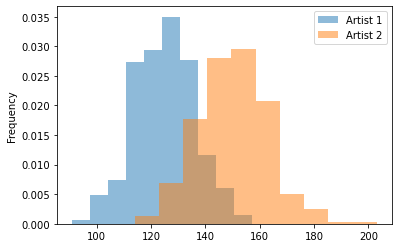

In [181]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: at least 1 or more of any whitespace character such as \r\n\t\f\v


In [182]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [194]:
# Your lyric length comparison chart here. 

# let add the length col in our lyrics dataframe

lyrics_df['length'] = [len(lyrics_df['song_content_clean'][i]) for i in range(len(lyrics_df))]
lyrics_df

,artist,song,song_content,song_content_clean,length
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...,"[mind, come, closer, seem, far, away, theres, ...",152
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...,"[alone, love, swept, away, im, lost, dark, set...",135
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...,"[dont, remember, shattered, dreams, cut, mind,...",112
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...,"[time, need, friend, youre, lonely, need, frie...",180
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her...","[cant, let, go, holding, hand, lost, dying, un...",137
5,Mariah Carey,dreamlover,['Dream Lover']\n\nI need a lover to give me\n...,"[dream, lover, need, lover, give, kind, love, ...",138
6,Mariah Carey,emotions,['Emotions']\n\nYou've got me feeling emotions...,"[emotions, youve, got, feeling, emotions, deep...",147
7,Mariah Carey,hero,['Hero']\n\nThere's a hero\nIf you look inside...,"[hero, theres, hero, look, inside, heart, dont...",121
8,Mariah Carey,idontwannacry,['I Don't Wanna Cry']\n\nOnce again we sit in ...,"[dont, wanna, cry, sit, silence, said, done, e...",177
9,Mariah Carey,ifitsover,['If It's Over']\n\nWon't you talk to me\nThis...,"[wont, talk, hand, somethings, gone, wrong, li...",85


artist
Mariah Carey    AxesSubplot(0.125,0.125;0.775x0.755)
Nicki Minaj     AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

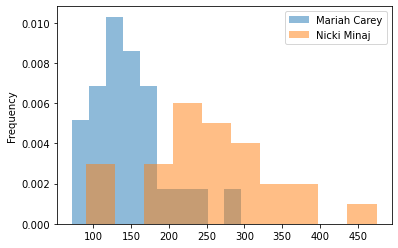

In [192]:
lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)